Test if the data support Zipf’s law econometrically. Also plot the most common 100 words in the data against the theoretical prediction of the law. For this question, do not remove stopwords. Also do not perform stemming or lemmatization. 

In [22]:
#import matplotlib
#import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
import math

In [2]:
comments = pd.read_csv("sample data.csv", names=['userid','date','review'])

In [3]:
comments.tail(3)

,userid,date,review
5997,graphicguy,11-Nov,i know there was quite a stir when the hyunda...
5998,sweendogy,11-Nov,infiniti is getting left behind? your comment...
5999,billyperksii,11-Nov,"here we go again- reviews, sales numbers, is ..."


In [4]:
comments['review'] = comments['review'].str.replace('[{}]'.format(string.punctuation), '')

/var/folders/gp/xs_xkf814zx898m2wdld0hw40000gn/T/ipykernel_7060/2590820161.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  comments['review'] = comments['review'].str.replace('[{}]'.format(string.punctuation), '')


In [5]:
comments[comments.isnull().any(axis=1)].head()

,userid,date,review


In [6]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userid  6000 non-null   object
 1   date    6000 non-null   object
 2   review  6000 non-null   object
dtypes: object(3)
memory usage: 140.8+ KB


In [7]:
import nltk
nltk.download('punkt')
from nltk.probability import FreqDist
from nltk import pos_tag, word_tokenize

all_words = comments['review'].sum()
words = nltk.tokenize.word_tokenize(all_words)
fdist = FreqDist(words)


[nltk_data] Downloading package punkt to /Users/ri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
fdist

FreqDist({'the': 32411, 'a': 15948, 'and': 13114, 'to': 12429, 'i': 11297, 'is': 9294, 'of': 8831, 'in': 8053, 'that': 7151, 'it': 6616, ...})

In [9]:
type(fdist)

nltk.probability.FreqDist

In [10]:
word_freq_df = pd.DataFrame(fdist.items(), columns=['word', 'frequency'])

In [11]:
word_freq_df.head()

,word,frequency
0,kia,5986
1,hyundai,6183
2,underachieving,2
3,and,13114
4,overachieving,2


In [12]:
pos = np.arange(100)
#plt.figure(figsize=(10,8))
s = 1
expected_zipf = [word_freq_df.sort_values(by='frequency', ascending=False)['frequency'][0]/(i+1)**s for i in pos]


In [13]:
final_zipf_df = word_freq_df.sort_values(by='frequency', ascending=False).iloc[:100]

final_zipf_df['zipf_value'] = expected_zipf

In [30]:
final_zipf_df

,rank,word,frequency,zipf_value,log_rank,log_freq,xreg
15,1,the,32411,5986.000000,0.000000,10.386253,-11.319341
49,2,a,15948,2993.000000,0.693147,9.677089,-10.626194
3,3,and,13114,1995.333333,1.098612,9.481436,-10.220728
47,4,to,12429,1496.500000,1.386294,9.427788,-9.933046
9,5,i,11297,1197.200000,1.609438,9.332292,-9.709903
...,...,...,...,...,...,...,...
183,96,how,848,62.354167,4.564348,6.742881,-6.754993
138,97,know,846,61.711340,4.574711,6.740519,-6.744630
688,98,also,846,61.081633,4.584967,6.740519,-6.734373
1214,99,infiniti,840,60.464646,4.595120,6.733402,-6.724221


Text(0.5, 1.0, 'Top 100 tokens in review')

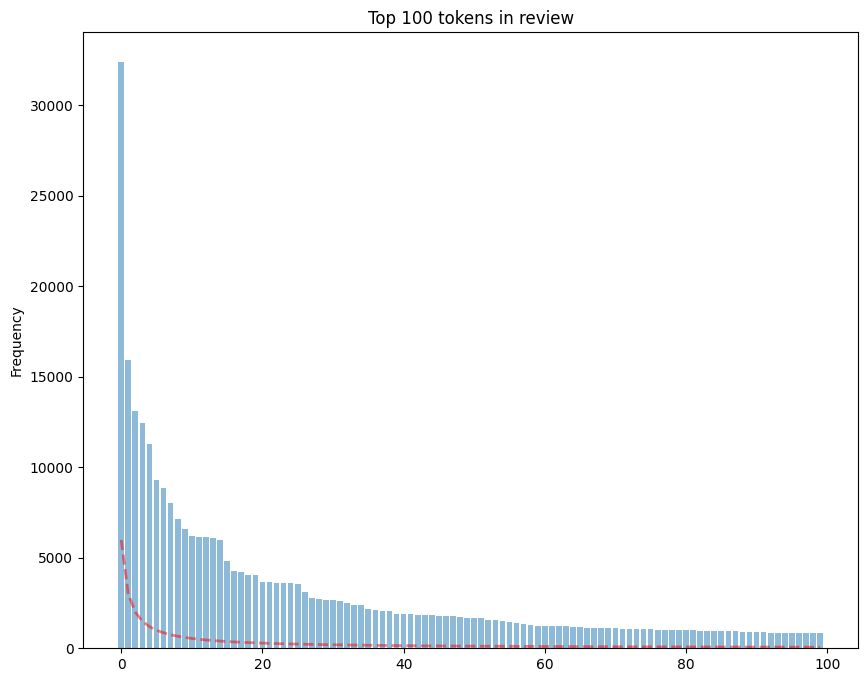

In [15]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.bar(pos, word_freq_df.sort_values(by='frequency', ascending=False)['frequency'][:100], align='center', alpha=0.5)
plt.plot(pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 100 tokens in review')

In [19]:
final_zipf_df.insert(0, 'rank', range(1, len(final_zipf_df) + 1))

In [23]:
final_zipf_df["log_rank"] = final_zipf_df["rank"].map(lambda x: math.log(x))
final_zipf_df["log_freq"] = final_zipf_df["frequency"].map(lambda x: math.log(x))

In [27]:
eco_denominator = final_zipf_df.loc[final_zipf_df["frequency"].idxmin(), "frequency"] * final_zipf_df.shape[0]

In [29]:
final_zipf_df["xreg"] = final_zipf_df["rank"].map(lambda x: math.log(x/eco_denominator))

In [31]:
eco_denominator

82400

In [32]:
math.log(1/82400)

-11.319340715897564

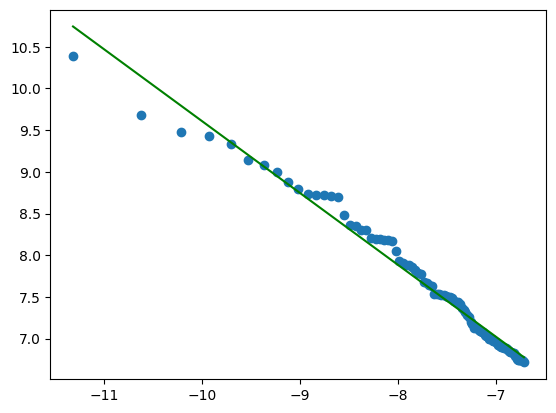

[[-0.86139307]]


In [34]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = final_zipf_df.loc[:, "xreg"].values.reshape(-1,1)
Y = final_zipf_df.loc[:, "log_freq"].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color="green")
plt.show()

print(model.coef_)